### kosis 부산광역시 가스공급량 2010-2020
- 년도별 도시가스/프로판 판매량 비율
  프로판 가스보다 도시가스 사용량이 점점 늘어나는가

- 년도별 도시가스, 년도별 프로판 사용량 상관도
  도시가스 사용량이 점점 많아지고 있는가
  프로판 가스 사용량은 점점 줄어들고 있는가

- 도시가스
	년도별 겨울(10, 11, 12, 1, 2, 3) 평균사용량/
	비겨울(4, 5, 6, 7, 8, 9) 평균사용량
	--> test (평균 사용량에 차이가 있는가.) 

### 같은 분석을, 프로판/부탄 가스를 대상으로 실행.

In [2]:
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
from scipy import stats

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    #print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))
    return set(len_list)

def dist_np(p1, p2): #  [3,10]  [5,25]
    return math.sqrt(sum((p2-p1)**2))

def process_product_names(s):
    r = []
    remove_after = ['(', ' 외', ' 외']
    split_at = ['+', ',']
    for c in remove_after:
        if c in s:
            s = s[:s.index(c)]
        
    for c in split_at:
        if c in s:
            r = r + s.split(c)
            
    if len(r) == 0:
        r.append(s)
    
    return r

# sample1 = 'productA+productB'
# sample2 = 'productA,productB'
# sample3 = 'product(A+B)'
# sample4 = 'product 외 abc'
# sample5 = 'product'

# print(process_product_names(sample1)) #['productA', 'productB']
# print(process_product_names(sample2))
# print(process_product_names(sample3))
# print(process_product_names(sample4))
# print(process_product_names(sample5))

In [9]:
np.set_printoptions(precision=5, suppress=True)

raw_data=[]
with open ('가스공급량_20230217170926.csv') as f:
    for line in f:
          raw_data.append(line[:-1].split(','))
            
            
#print(raw_data)
# t = set()            
# for e in raw_data:
#     t.add(len(e))
# print(t)

np_data = np.array(raw_data[2:])
print(np_data)
# np_data = np_data[:, 2:].astype(np.int64)
# print(np_data[:3])

[['"2010"' '"1월"' '1' ... '8775' '64' '26227']
 ['"2010"' '"2월"' '1' ... '8745' '64' '23518']
 ['"2010"' '"3월"' '1' ... '8092' '64' '23959']
 ...
 ['"2020"' '"10월"' '1' ... '8634' '65' '14132']
 ['"2020"' '"11월"' '1' ... '10871' '65' '14834']
 ['"2020"' '"12월"' '1' ... '13058' '65' '13052']]


[[     12 1308867    3532  111675     798  286475]
 [     12 1319651    3380   98759     844  270322]
 [     12 1336780    3359   73029     832  259423]]


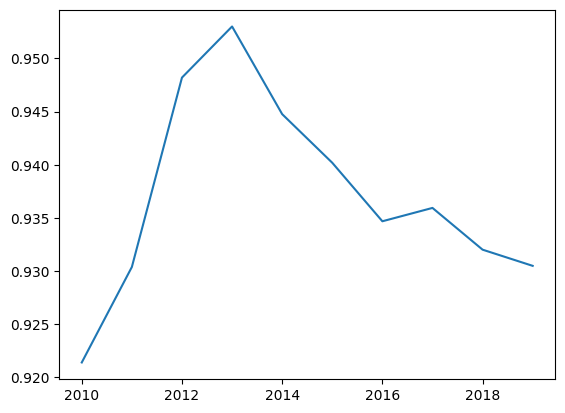

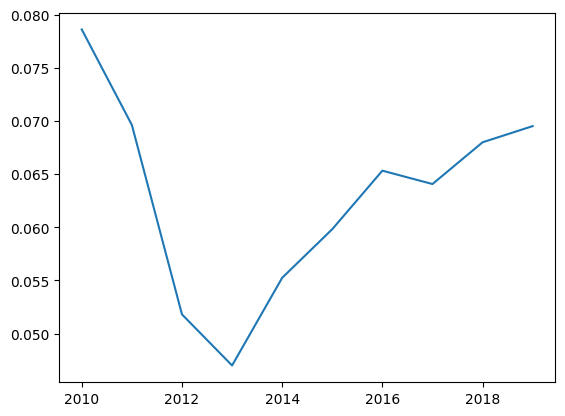

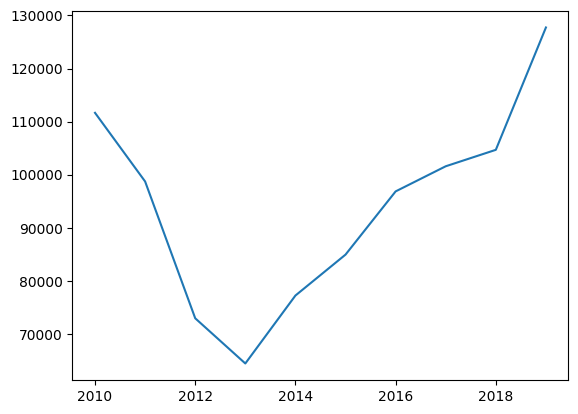

In [14]:
#print(np_data.shape)
#print(np.arange(0, 130, 12))
by_year = np.add.reduceat(np_data, np.arange(10, 130, 12))
print(by_year[:3])

total_gas = by_year[:, 1] + by_year[:, 3]
ln_gas = by_year[:, 1]/total_gas
lp_gas = by_year[:, 3]/total_gas

# _, axe = plt.subplots()
# axe.plot(np.arange(2010, 2020), ln_gas)

# _, axe = plt.subplots()
# axe.plot(np.arange(2010, 2020), lp_gas)

_, axe = plt.subplots()
axe.plot(np.arange(2010, 2020), by_year[:, 3]) # 년도별 도시가스 총 사용량
#axe.plot(np.arange(2010, 2020), by_year[:, 1]/12) # 년도별 도시가스 평균 사용량

[[1.      0.70736]
 [0.70736 1.     ]]


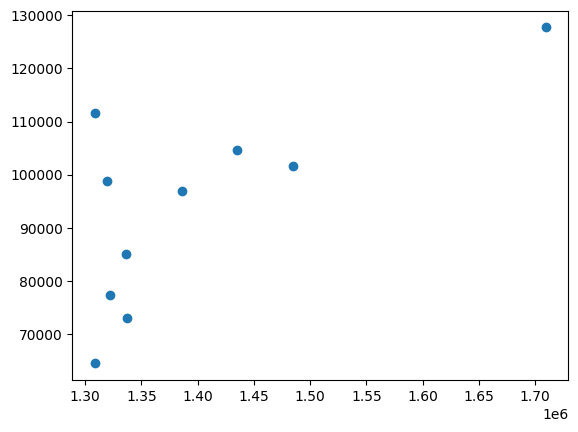

In [15]:
print(np.corrcoef(by_year[:, 1], by_year[:, 3]))
_, axe = plt.subplots()
axe.scatter(by_year[:, 1], by_year[:, 3])

In [19]:
by_season = np.add.reduceat(np_data[3:], np.arange(0, 130, 6))
print(by_season[:3])

print('================')
summers_sum = by_season[::2]
print(summers_sum[:2])
print('================')
winters_sum = by_season[::]
print(winters_sum[:2])

[[     6 461211   1866  41722    384 142333]
 [     6 843029   1806  59549    393 146533]
 [     6 462670   1746  53486    402 140882]]
[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]]
[[     6 461211   1866  41722    384 142333]
 [     6 843029   1806  59549    393 146533]]


In [21]:
#2010년 여름 평균 사용량 : 프로판가스
lp_gas2010_summer = np_data[3:9, 3]
print(lp_gas2010_summer)
# print(summers_sum[0])
# print(np_data[3:9])


#2010-2011년 겨울 평균 사용량 : 프로판 가스
lp_gas2010_winter = np_data[9:15, 3]
print(lp_gas2010_winter)
# print(winters_sum[0])
# print(np_data[9:15])

# ttest 귀무가설
# 두개의 mean 값은 같은 모집단에서 나온 것.
# 두개의 mean값을 같은 것으로 보아야 한다.
stats.ttest_ind(lp_gas2010_summer, lp_gas2010_winter)

[8105 7787 7137 5928 6023 6742]
[ 6366  8560  9397 12137 10072 13017]


In [22]:
#2011년 여름, 2011-2012년 겨울 도시가스 사용량 ttest_ind

lp_gas2011_summer = np_data[15:21, 1]
print(lp_gas2011_summer, np.mean(lp_gas2011_summer))

lp_gas2011_winter = np_data[21:27, 1]
print(lp_gas2011_winter, np.mean(lp_gas2011_winter))

stats.ttest_ind(lp_gas2011_summer, lp_gas2011_winter)

[103965  83355  74141  70168  64615  66426] 77111.66666666667
[ 81153  99188 164254 178441 173008 144653] 140116.16666666666


Ttest_indResult(statistic=-3.5606327383239305, pvalue=0.005175795051470046)

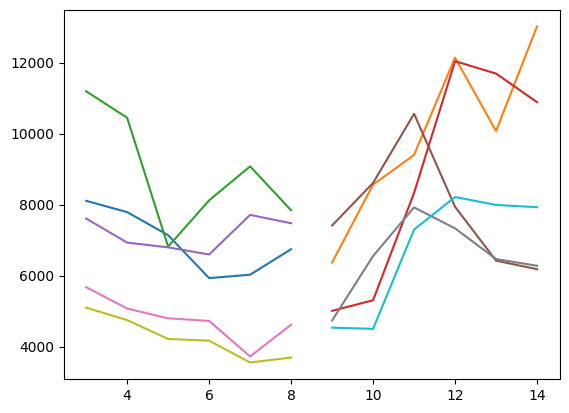

In [25]:
_, axe = plt.subplots()
year = 2010
gas_index = 3
for i in range(0, 10, 2):
    j = 3 + 6*i
    summer = np_data[j:j+6]
    winter = np_data[j+6:j+12]
    axe.plot(np.arange(3,9), summer[:, gas_index])
    axe.plot(np.arange(9,15), winter[:, gas_index])